In [228]:
## load data from D/ML-5/data/CMO_MSP_Mandi.csv
## load data from D/ML-5/data/Monthly_data_cmo.csv

import pandas as pd

CMO_MSP_Mandi  = pd.read_csv('D:\ML-5\data\CMO_MSP_Mandi.csv')
Monthly_data_cmo = pd.read_csv('D:\ML-5\data\Monthly_data_cmo.csv')

In [229]:
# Show the first 5 rows of CMO_MSP_Mandi

CMO_MSP_Mandi.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [230]:
# Show the first 5 rows of Monthly_data_cmo

Monthly_data_cmo.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [231]:
## Remove the rows from Mothly_data_cmo which with null values or NaN values

Monthly_data_cmo = Monthly_data_cmo.dropna()


In [232]:
## Count the distinct commodities in CMO_MSP_Mandi

print("There are "+str(CMO_MSP_Mandi['commodity'].nunique())+" distinct commodities in CMO_MSP_Mandi") 

CMO_MSP_Mandi.nunique()

There are 32 distinct commodities in CMO_MSP_Mandi


commodity     32
year           5
Type           3
msprice       97
msp_filter     1
dtype: int64

In [233]:
## Count the unique values in all columns of Monthly_data_cmo

print(Monthly_data_cmo.nunique())
print("Inference ")

APMC                 349
Commodity            352
Year                   3
Month                 12
arrivals_in_qtl    11169
min_price           8503
max_price           9739
modal_price         9327
date                  27
district_name         33
state_name             1
dtype: int64
Inference 


In [234]:
## We can drop the Year and Month column from training data as we have the date column which is relevant for our analysis
## We can drop the state_name from training data as it has only one unique value

## Drop the Month and Year column from Monthly_data_cmo

Monthly_data_cmo.drop(['Month','Year'],axis=1,inplace=True)

## Drop the state_name column from Monthly_data_cmo

Monthly_data_cmo.drop(['state_name'],axis=1,inplace=True)



In [235]:
Monthly_data_cmo.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar
1,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar
2,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar
3,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar
4,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar


In [236]:
## Get the average modal price for each commodity in each market

print(Monthly_data_cmo.groupby(['APMC','Commodity'])['modal_price'].mean())

print("Thus we can see that the average modal price for each commodity in each market is different")
print("This indicates that our prediction should take the commodity and the APMC region into consideration")

APMC        Commodity       
Aamgaon     PADDY-UNHUSKED      1419.000000
            Paddy-Unhusked      1555.153846
Aarni       Black Gram          6988.333333
            Gram                3943.769231
            Green Gram          6412.666667
                                   ...     
Zarijamini  Pigeon Pea (Tur)    6646.000000
            SOYBEAN             2601.000000
            Sorgum(Jawar)       1424.000000
            Soybean             3089.846154
            Wheat(Husked)       1500.000000
Name: modal_price, Length: 7452, dtype: float64
Thus we can see that the average modal price for each commodity in each market is different
This indicates that our prediction should take the commodity and the APMC region into consideration


In [237]:
## Since we have taken the APMC region in consideration, we can drop the district_name column from Monthly_data_cmo

Monthly_data_cmo.drop(['district_name'],axis=1,inplace=True)
Monthly_data_cmo.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date
0,Ahmednagar,Bajri,79,1406,1538,1463,2015-04
1,Ahmednagar,Bajri,106,1788,1925,1875,2016-04
2,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04
3,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04
4,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04


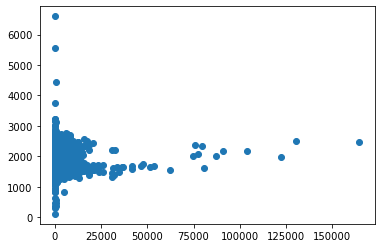

In [238]:
# Plot for arrival_in_qtl to modal_price for Bajri Commodity 

import matplotlib.pyplot as plt

plt.scatter(Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['arrivals_in_qtl'],Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['modal_price'])

Text(0.5, 0, 'date')

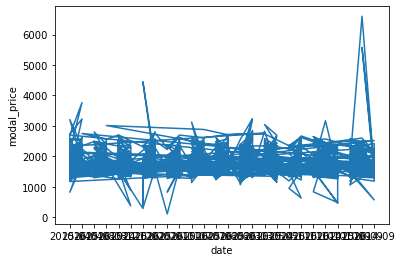

In [239]:
plt.plot(Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['date'],Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['modal_price'])

## Change y axis label
plt.ylabel('modal_price')
## Change x axis label
plt.xlabel('date')

In [240]:
## In the graph above we see a large number of outliers
## We can remove the outliers by using the z-score method

from scipy import stats

## We need to remove outlier for each commodity separately

## We calculate the z_score for each commodity

for commodity in Monthly_data_cmo['Commodity'].unique():
    Monthly_data_cmo.loc[Monthly_data_cmo['Commodity']==commodity,'z_score'] = stats.zscore(Monthly_data_cmo[Monthly_data_cmo['Commodity']==commodity]['modal_price'])

    ## We remove the rows with z_score greater than or equal to absolute value of 4

Monthly_data_cmo = Monthly_data_cmo[Monthly_data_cmo['z_score']<4][Monthly_data_cmo['z_score']>-4]

## We repeat the same for arrival in qtl

for commodity in Monthly_data_cmo['Commodity'].unique():
    Monthly_data_cmo.loc[Monthly_data_cmo['Commodity']==commodity,'z_score'] = stats.zscore(Monthly_data_cmo[Monthly_data_cmo['Commodity']==commodity]['arrivals_in_qtl'])

    ## We remove the rows with z_score greater than or equal to absolute value of 4

Monthly_data_cmo = Monthly_data_cmo[Monthly_data_cmo['z_score']<4][Monthly_data_cmo['z_score']>-4]





# Monthly_data_cmo['z_score'] = stats.zscore(Monthly_data_cmo['modal_price'])
# Monthly_data_cmo.head()

# ## We remove the rows with z_score greater than 0.2

# Monthly_data_cmo = Monthly_data_cmo[Monthly_data_cmo['z_score']<0.2]
# Monthly_data_cmo.drop(['z_score'],axis=1,inplace=True)

# ## Similarly we can remove the outliers from arrivals_in_qtl

# Monthly_data_cmo['z_score'] = stats.zscore(Monthly_data_cmo['arrivals_in_qtl'])

# ## We remove the rows with z_score greater than 1

# Monthly_data_cmo = Monthly_data_cmo[Monthly_data_cmo['z_score']<1]
# Monthly_data_cmo.drop(['z_score'],axis=1,inplace=True)


<ipython-input-240-3810b43103e8>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Monthly_data_cmo = Monthly_data_cmo[Monthly_data_cmo['z_score']<4][Monthly_data_cmo['z_score']>-4]
<ipython-input-240-3810b43103e8>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Monthly_data_cmo = Monthly_data_cmo[Monthly_data_cmo['z_score']<4][Monthly_data_cmo['z_score']>-4]


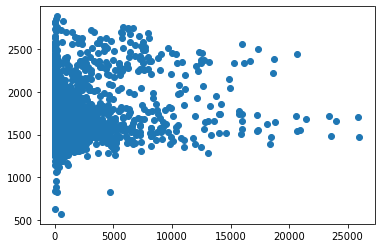

In [241]:
import matplotlib.pyplot as plt

plt.scatter(Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['arrivals_in_qtl'],Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['modal_price'])

In [242]:
Monthly_data_cmo.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,z_score
0,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,-0.396570
1,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,-0.377686
2,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,-0.063890
3,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,-0.197294
4,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,0.632672


Text(0.5, 0, 'date')

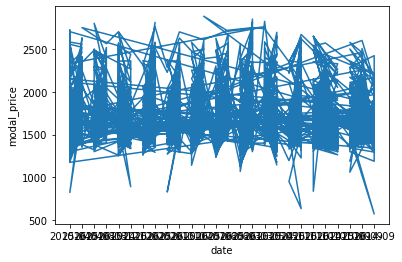

In [248]:
## Plot the variation of modal_price of Wheat(Husked) with date

plt.plot(Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['date'],Monthly_data_cmo[Monthly_data_cmo['Commodity']=='Wheat(Husked)']['modal_price'])

## Change y axis label
plt.ylabel('modal_price')
## Change x axis label
plt.xlabel('date')

In [244]:
## Thus we have loosly filtered the outliers from the data. 
## We have also identified that the modal price is most importantly dependent on the commodity,
## the APMC region and the arrival in quintal 

In [245]:
Monthly_data_cmo.drop(['z_score'],axis=1,inplace=True)

## Now we can save the cleaned data to a csv file

Monthly_data_cmo.to_csv('D:\ML-5\data\Cleaned_data.csv',index=False)

In [246]:
Monthly_data_cmo.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date
0,Ahmednagar,Bajri,79,1406,1538,1463,2015-04
1,Ahmednagar,Bajri,106,1788,1925,1875,2016-04
2,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04
3,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04
4,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04
